In [1]:
import nltk

nltk.download('averaged_perceptron_tagger')
nltk.download("gutenberg")
nltk.download('punkt')
nltk.download('reuters')
nltk.download("stopwords")
nltk.download("webtext")
nltk.download("wordnet")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Home\AppData\Roaming\nltk_data...
[nltk_data]   Un

True

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve

In [2]:
iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

In [9]:
fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

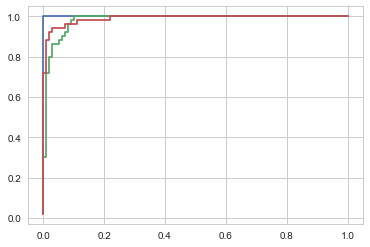

In [18]:
%matplotlib inline
for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

In [22]:
fpr[0]

array([0.  , 0.  , 0.  , 0.  , 0.6 , 0.62, 1.  ])

In [19]:
fpr[1]

array([0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.05, 0.05, 0.06,
       0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.12, 0.85,
       0.88, 1.  ])

In [20]:
fpr[2]

array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.07,
       0.07, 0.11, 0.11, 0.22, 0.22, 0.86, 0.89, 1.  ])

In [23]:
fpr

[array([0.  , 0.  , 0.  , 0.  , 0.6 , 0.62, 1.  ]),
 array([0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.05, 0.05, 0.06,
        0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1 , 0.1 , 0.12, 0.85,
        0.88, 1.  ]),
 array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.07,
        0.07, 0.11, 0.11, 0.22, 0.22, 0.86, 0.89, 1.  ])]

In [24]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [ ]:
logit_mod = sm.Logit(y, )

In [25]:
from sklearn.datasets import make_classification

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=4)
X = sm.add_constant(X0)

In [26]:
logit_mod = sm.Logit(y, X)

In [28]:
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.160844
         Iterations 8


In [30]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jul 2018   Pseudo R-squ.:                  0.7679
Time:                        16:05:29   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
                                        LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2515      0.477      0.527      0.598      -0.683       1.186
x1             4.2382      0.902      4.699      0.000       2.470       6.006


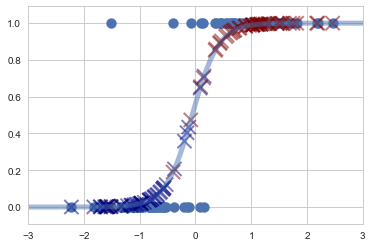

In [43]:
xx = np.linspace(-3, 3, 100)
theta = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, theta, lw=5, alpha=0.5)
plt.scatter(X0, y, marker='o', s=100)
plt.scatter(X0, logit_res.predict(X), marker='x', c=y, s=200, lw=2,
            alpha=0.5, cmap=mpl.cm.jet)
plt.xlim(-3, 3)
plt.show()

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_raw = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_raw.rename(inplace=True, columns={"sepal length (cm)" : "sepal_length"})

sy = pd.Series(iris.target)
iris_raw["species"] = sy
iris_raw.tail()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [12]:
df = iris_raw[(iris_raw["species"] == 0) | (iris_raw["species"] == 1)].reset_index(drop=True)
df.tail()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
# chisqprob 함수가 없다는 오류가 발생하면 다음 두 줄을 실행한다.
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

model = sm.Logit.from_formula("species ~ sepal_length", df)
result = model.fit(disp=0)
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                  0.5368
Time:                        07:31:07   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403      1.007      5.107      0.000       3.168       7.113


In [18]:
predict = result.predict(df["sepal_length"])

df["predict"] = predict
df.loc[df[df["predict"] >= 0.5].index, "y"] = 1
df.loc[df[df["predict"] < 0.5].index, "y"] = 0
df.tail()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),species,predict,y
95,5.7,3.0,4.2,1.2,1,0.812824,1.0
96,5.7,2.9,4.2,1.3,1,0.812824,1.0
97,6.2,2.9,4.3,1.3,1,0.982684,1.0
98,5.1,2.5,3.0,1.1,1,0.165794,0.0
99,5.7,2.8,4.1,1.3,1,0.812824,1.0


In [171]:
print(confusion_matrix(df["species"], df["y"]))

[[45  5]
 [ 6 44]]


In [186]:
print(classification_report(df["species"], df["y"]))

             precision    recall  f1-score   support

          0       0.88      0.90      0.89        50
          1       0.90      0.88      0.89        50

avg / total       0.89      0.89      0.89       100



In [192]:
fpr, tpr, thresholds1 = roc_curve(df["species"], predict)

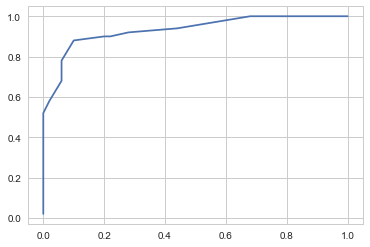

In [193]:
plt.plot(fpr, tpr)

In [194]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9325999999999999

In [5]:
from sklearn.datasets import make_classification

In [31]:
y

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [66]:

X, y = make_classification(n_features=3, n_informative=3, n_redundant=0, 
                           n_clusters_per_class=2, n_classes=3)

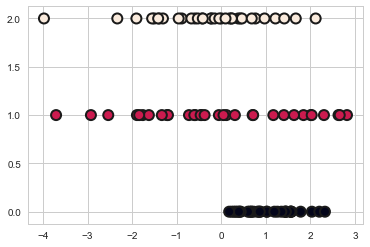

In [71]:
plt.scatter(X[:, 0], y, marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

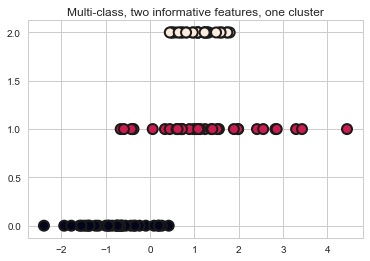

In [60]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], y, marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

In [73]:
from sklearn.preprocessing import StandardScaler

In [75]:
from sklearn.datasets import load_iris
iris = load_iris()
data1 = iris.data

In [79]:
data1

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [76]:
scaler = StandardScaler()
scaler.fit(data1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [80]:
data2 = scaler.transform(data1)
data2

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [87]:
from sklearn.preprocessing import scale
x = np.hstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2])
y1 = scale(x)

In [88]:
x

array([-20., -19., -18., -17., -16.,  -2.,  -1.,   0.,   1.,   2.])

In [1]:
from sklearn.preprocessing import OneHotEncoder

In [2]:
ohe = OneHotEncoder()

In [3]:
X = np.array([[0], [1], [2]])
X

array([[0],
       [1],
       [2]])

In [4]:
ohe.fit(X)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [7]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3], dtype=int32), array([0, 1, 2], dtype=int64))

In [9]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [22]:
ohe.fit(X)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [23]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]),
 array([ 0,  2,  5, 10], dtype=int32),
 array([0, 1, 2, 3, 4, 5, 6, 7, 9], dtype=int64))

In [25]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [26]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

In [27]:
X

array([[0, 0, 4],
       [1, 1, 0],
       [0, 2, 1],
       [1, 0, 2]])

In [28]:
Y = 3

In [30]:
ohe = OneHotEncoder()

In [31]:
ohe.fit_transform(Y).toarray()

array([[1.]])

In [33]:
from sklearn.preprocessing import Imputer

In [36]:
imp = Imputer(missing_values="NaN", strategy="mean", axis=0)
imp

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [37]:
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

In [44]:
np.var([1, 2, 3, 7, 6])

5.36

In [45]:
np.std([1, 2, 3, 7, 6]) * np.std([1, 2, 3, 7, 6])

5.360000000000001

In [46]:
from sklearn.preprocessing import Binarizer

In [65]:
X = np.array([[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]])
binarizer = Binarizer().fit_transform(X) 

In [66]:
binarizer

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [68]:
X[:, 2]

array([ 2.,  0., -1.])

In [49]:
Binarizer().fit_transform(X[:, 2])

TypeError: list indices must be integers or slices, not tuple

In [70]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [71]:
poly = PolynomialFeatures(2)
poly.fit(X)
poly.transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [89]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
X

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

In [90]:
X[0]

array([-1, -1])

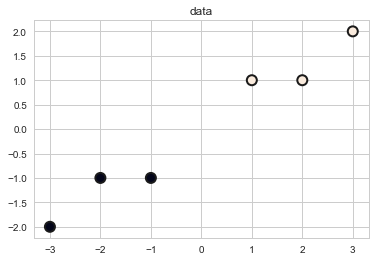

In [91]:
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.title("data")
plt.show()

In [92]:
%matplotlib inline

In [93]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)
x = [[0, 0]]
model.predict_proba(x)

array([[0.5, 0.5]])

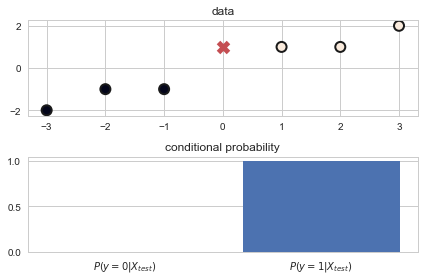

In [96]:
x = [[0, 1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

In [97]:
p

array([3.3535013e-04, 9.9966465e-01])

In [ ]:
plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("conditional probability")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.tight_layout()
plt.show()

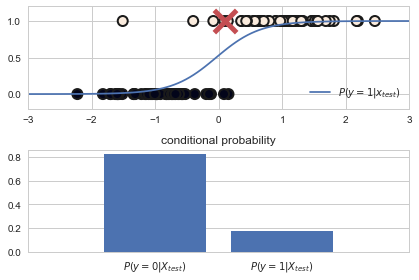

In [100]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(0.1, model.predict(0.1), marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|X_{test})$", "$P(y=1|X_{test})$"])
plt.title("conditional probability")
plt.tight_layout()
plt.show()

In [101]:
model.predict(0.1)

array([1])

In [2]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

In [1]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model_norm = GaussianNB().fit(X, y)

In [12]:
model_norm.classes_

array([0., 1.])

In [13]:
model_norm.class_count_

array([40., 60.])

In [17]:
model_norm.sigma_

array([[1.02398854, 2.31390497],
       [1.25429371, 1.93742544]])

In [22]:
model_norm.predict([[-0.7, -0.8]])

array([0.])

In [25]:
sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf([-0.7, -0.8])

array([0.18115014, 0.19153637])

In [26]:
0.18115014*0.19153637

0.0346968402405918

In [27]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [28]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [29]:
fc = model_bern.feature_count_

In [30]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [32]:
np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[4., 4., 4., 4.],
       [6., 6., 6., 6.]])

In [33]:
model_bern.class_count_[:, np.newaxis]

array([[4.],
       [6.]])

In [34]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [35]:
x_new = np.array([1, 1, 0, 0])
theta ** x_new

array([[0.5       , 0.83333333, 1.        , 1.        ],
       [0.375     , 0.5       , 1.        , 1.        ]])

In [42]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [49]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [52]:
model_mult.predict([[10, 10, 10, 10]])

array([1])

In [44]:
model_mult.classes_

array([0, 1])

In [45]:
model_mult.class_count_

array([4., 6.])

In [46]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [47]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [48]:
 np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[40., 40., 40., 40.],
       [48., 48., 48., 48.]])

In [2]:
from itertools import combinations
for pairidx, pair in enumerate(combinations(range(4), 2)):
    X = iris.data[:, pair]
    y = iris.target
    idx = np.arange(X.shape[0])

0 (0, 1)
1 (0, 2)
2 (0, 3)
3 (1, 2)
4 (1, 3)
5 (2, 3)


In [2]:
X = np.array([[-1, -1], [-1.5, -1.5], [1, -0.5], 
              [-3.5, -2.5], [0, 1], [1, 1.5], [-2, -0.5]])
y = np.array([1, 1, 1, 2, 2, 2, 2])

plt.scatter(X[y==1,0], X[y==1,1], s=100, marker='o', c='r')
plt.scatter(X[y==2,0], X[y==2,1], s=100, marker='x', c='b')

x_new = [0.5, 0]

plt.scatter(x_new[0], x_new[1], s=100, marker='^', c='g')
plt.show()

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression(random_state=1)
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])

probas = [c.fit(X, y).predict_proba([x_new]) for c in (model1, model2, model3, ensemble)]
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

In [6]:
class1_1

[0.5680427234871603,
 0.7649244538877006,
 0.18822873982832575,
 0.42735616425787815]

In [7]:
probas

[array([[0.56804272, 0.43195728]]),
 array([[0.76492445, 0.23507555]]),
 array([[0.18822874, 0.81177126]]),
 array([[0.42735616, 0.57264384]])]